Generate synthetic mixtures from a known mixing matrix and sparse independent samples. Use these to verify your implementation of ICA algorithm.

In [93]:
def drawDataWithMixingMatrix(data, mat):
    # plot data points
    plt.scatter(data[0], data[1], s=1)
    # calculate axis length
    lenAxis = np.sqrt(np.sum(np.square(mat), axis=0))
    # calculate scale for illustration
    scale = np.min(np.max(np.abs(data), axis=1) / lenAxis.T)
    # draw axis as arrow
    plt.arrow(0, 0, scale * mat[0,0], scale * mat[1,0], shape='full', color='r')
    plt.arrow(0, 0, scale * mat[0,1], scale * mat[1,1], shape='full', color='y')

In [78]:
def bss(X, max_iter):
    W = np.identity(X.shape[0])
    for i in range(0, max_iter) :
        new_source = np.linalg.inv(W).dot(X)
        dW = - W.dot((new_source.dot(X.T) + np.identity(W.shape[0])))
        likelihood = np.sum(new_source)
        if i % 1000 == 0:
            print("The log likelihood after ", i, " iterations is ", likelihood)
        dC = np.sum(1 / np.exp(new_source)) # Checking if the slope is equal to 0 for convergence
        W -= dW * 0.00001
        if dC == 0:
            break
    return W, new_source

In [70]:
def syntheticDataGenerate(verifyA, nsamples):
    mat = np.random.laplace(size=(verifyA.shape[0], nsamples))
    synthData = verifyA.dot(mat)
    return synthData

In [71]:
# quantity of data points
nsamples = 10000
# specific mixing matrix (for illustration purpose)
verifyA = np.asarray([[-1, 1],[2, 2]])
# generate synthetic data
synthData = syntheticDataGenerate(verifyA, nsamples)
print(synthData)
#bss(synthData)
# do optimization with bss function
estimateA, recoverData = bss(synthData, 10000)
print(estimateA)

[[-0.17535192 -1.58870479 -0.94827414 ... -0.75273144  0.78600345
  -1.1191308 ]
 [-1.67126084  2.04374754  4.00894662 ...  5.57635617  0.8484695
  -2.61898633]]
The likelihood after  0  iterations is  -120.11628437264086
The likelihood after  1000  iterations is  0.42377396790630467
The likelihood after  2000  iterations is  0.21119464961543502
The likelihood after  3000  iterations is  0.1401725979068536
The likelihood after  4000  iterations is  0.1046324196312861
The likelihood after  5000  iterations is  0.083299830721952
The likelihood after  6000  iterations is  0.06907516223134284
The likelihood after  7000  iterations is  0.058913678810289194
The likelihood after  8000  iterations is  0.05129234957113099
The likelihood after  9000  iterations is  0.045364784128868525
[[ 4337.99741253    60.97612403]
 [   60.97612403 16704.64200838]]


In [72]:
def compareMixingMatrix(data, matA, matB):
    plt.figure(figsize=(16, 8))
    # plot first mixing matrix
    plt.subplot(1,2,1)
    drawDataWithMixingMatrix(data, matA)
    # plot first mixing matrix
    plt.subplot(1,2,2)
    drawDataWithMixingMatrix(data, matB)

[[ 4337.99741253    60.97612403]
 [   60.97612403 16704.64200838]]


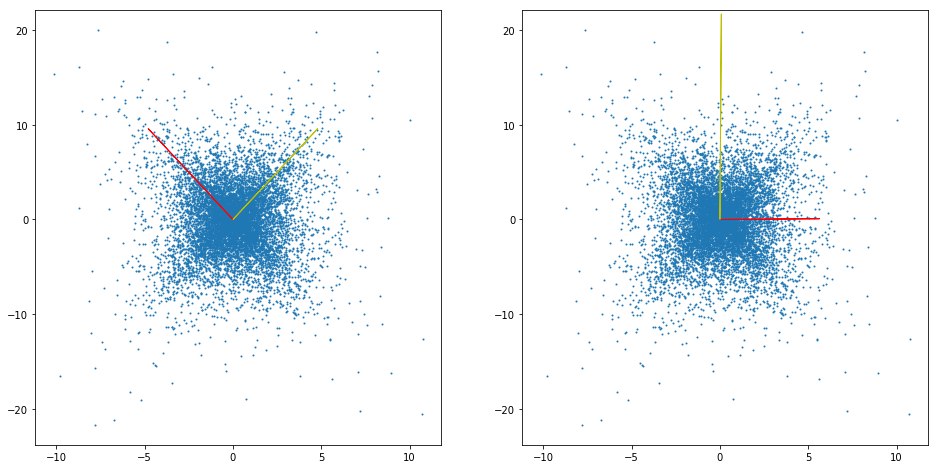

In [73]:
print(estimateA)
compareMixingMatrix(synthData, verifyA, estimateA)
plt.show()

I have changed the number of samples and checked the implementation.

In [74]:
# quantity of data points
nsamples = 5000
# specific mixing matrix (for illustration purpose)
verifyA = np.asarray([[2, 0],[4, 2]])
# generate synthetic data
synthData = syntheticDataGenerate(verifyA, nsamples)
print(synthData)
#bss(synthData)
# do optimization with bss function
estimateA, recoverData = bss(synthData, 10000)
print(estimateA)

[[ 1.33888664 -0.09450231 -1.91471283 ...  0.05715143  0.93516534
  -3.01080746]
 [ 3.44715641  0.10726798 -8.79384918 ... -2.90947898  3.58336374
   2.22242293]]
The likelihood after  0  iterations is  -29.498500696881308
The likelihood after  1000  iterations is  -0.10975268932647807
The likelihood after  2000  iterations is  -0.05495488490522463
The likelihood after  3000  iterations is  -0.03653186932187873
The likelihood after  4000  iterations is  -0.027290945303249416
The likelihood after  5000  iterations is  -0.021737160658725708
The likelihood after  6000  iterations is  -0.018030937364921125
The likelihood after  7000  iterations is  -0.015381933665746448
The likelihood after  8000  iterations is  -0.013394336566691688
The likelihood after  9000  iterations is  -0.011847995783899778
[[ 4313.13270973  8584.493904  ]
 [ 8584.493904   21379.03138181]]


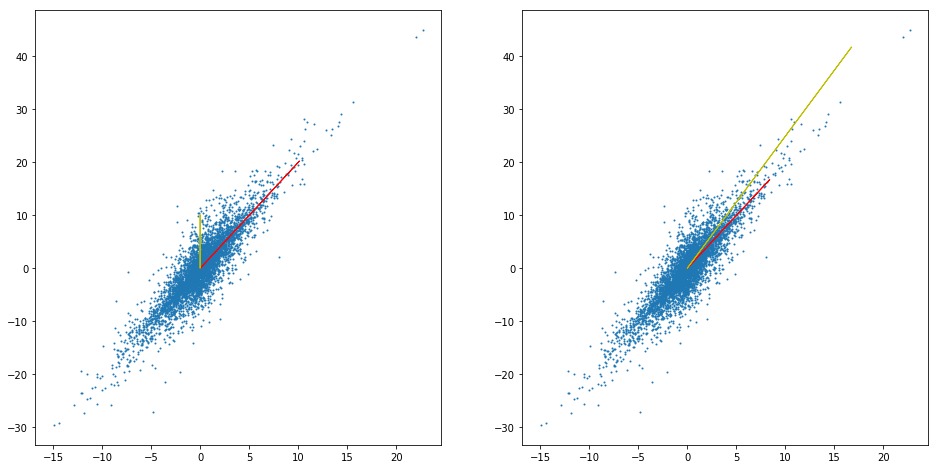

In [75]:
compareMixingMatrix(synthData, verifyA, estimateA)
plt.show()

Below I have tried it of a sample of 3 mixtures to see how it works - 

In [79]:
# quantity of data points
nsamples = 5000
# specific mixing matrix (for illustration purpose)
verifyA = np.asarray([[2, 0, 1],[4, 2, 5], [-1, -2, -3]])
# generate synthetic data
synthData = syntheticDataGenerate(verifyA, nsamples)
print(synthData)
#bss(synthData)
# do optimization with bss function
estimateA, recoverData = bss(synthData, 10000)
print(estimateA)

[[ -3.75474235   0.69116544   1.62245032 ...   0.3174387   -0.22777249
   -0.77977366]
 [-16.51117375  -4.02858118  -5.6179203  ...   2.79623476  -2.86491171
   10.67830483]
 [  9.65869397   4.2100396    6.60686257 ...  -1.96965705   1.45566699
  -12.21725325]]
The log likelihood after  0  iterations is  -34.1712848112179
The log likelihood after  1000  iterations is  -1.9497552142701808
The log likelihood after  2000  iterations is  -1.2496366069266212
The log likelihood after  3000  iterations is  -0.9084179367214991
The log likelihood after  4000  iterations is  -0.7108515410478218
The log likelihood after  5000  iterations is  -0.5825153011371584
The log likelihood after  6000  iterations is  -0.4925664160843144
The log likelihood after  7000  iterations is  -0.42606205154996735
The log likelihood after  8000  iterations is  -0.3749094687274934
The log likelihood after  9000  iterations is  -0.3343510965308737
[[  5261.60831533  13487.35155614  -5106.07337724]
 [ 13487.35155614  46

In [90]:
print('Real Matrix:', verifyA)
print('Estimated Matrix:', estimateA)

Real Matrix: [[ 2  0  1]
 [ 4  2  5]
 [-1 -2 -3]]
Estimated Matrix: [[  8095.88466707  20753.97915352  -7857.09039959]
 [ 20753.97915352  70947.61812818 -35984.32061383]
 [ -7857.09039959 -35984.32061383  21889.76721309]]


In [91]:
#Running it for a longer time - 
estimateA, recoverData = bss(synthData, 15000)
print(estimateA)

The log likelihood after  0  iterations is  -34.1712848112179
The log likelihood after  1000  iterations is  -1.9497552142701808
The log likelihood after  2000  iterations is  -1.2496366069266212
The log likelihood after  3000  iterations is  -0.9084179367214991
The log likelihood after  4000  iterations is  -0.7108515410478218
The log likelihood after  5000  iterations is  -0.5825153011371584
The log likelihood after  6000  iterations is  -0.4925664160843144
The log likelihood after  7000  iterations is  -0.42606205154996735
The log likelihood after  8000  iterations is  -0.3749094687274934
The log likelihood after  9000  iterations is  -0.3343510965308737
The log likelihood after  10000  iterations is  -0.3014090663109774
The log likelihood after  11000  iterations is  -0.27412500267978734
The log likelihood after  12000  iterations is  -0.25115847010811587
The log likelihood after  13000  iterations is  -0.23156121918450023
The log likelihood after  14000  iterations is  -0.21464360

In [92]:
print('Real Matrix:', verifyA)
print('Estimated Matrix:', estimateA)

Real Matrix: [[ 2  0  1]
 [ 4  2  5]
 [-1 -2 -3]]
Estimated Matrix: [[  8095.88466707  20753.97915352  -7857.09039959]
 [ 20753.97915352  70947.61812818 -35984.32061383]
 [ -7857.09039959 -35984.32061383  21889.76721309]]
